<a href="https://colab.research.google.com/github/chaeyeon00/Computer-Vision/blob/main/AlextNet01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch
!pip install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
import torchvision
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, datasets
from torch.autograd import Variable
from torch import optim
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] # FashionMNIST 클래스

In [ ]:
AlexTransform = transforms.Compose([
    transforms.Resize((227, 227)),
    transforms.ToTensor()
   # transforms.Normalize((0.1307,), (0.3081,))
])

In [ ]:
training_data = datasets.FashionMNIST(
    root="data", # data가 저장될 경로(path)
    train=True, # training dataset
    download=True, # 인터넷으로부터 데이터 다운
    transform=AlexTransform # feature 및 label 변환 지정
)

validation_data = datasets.FashionMNIST(
    root="data",
    train=False, # test dataset
    download=True,
    transform=AlexTransform
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
#데이터 로드
training_loader = DataLoader(training_data, batch_size=128, shuffle=True)
validation_loader = DataLoader(validation_data, batch_size=128, shuffle=True)

Feature batch shape: torch.Size([128, 1, 227, 227])
Labels batch shape: torch.Size([128])


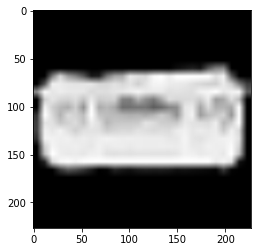

Label: Bag


In [ ]:
#데이터 이미지 및 lable 확인
train_features, train_labels = next(iter(training_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = class_names[train_labels[0]]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [ ]:
class fasion_mnist_alexnet2(nn.Module):  
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=96, kernel_size=11, stride=4, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(96, 256, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(3, 2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(256, 384, 3, 1, 1),
            nn.ReLU()
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(384, 384, 3, 1, 1),
            nn.ReLU()
        )
        self.conv5 = nn.Sequential(
            nn.Conv2d(384, 256, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(3, 2)
        )

        self.fc1 = nn.Linear(256 * 6 * 6, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, 10)

    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.conv5(out)
        out = out.view(out.size(0), -1)

        out = F.relu(self.fc1(out))  # 256*6*6 -> 4096
        out = F.dropout(out, 0.5)
        out = F.relu(self.fc2(out))
        out = F.dropout(out, 0.5)
        out = self.fc3(out)
        out = F.log_softmax(out, dim=1)

        return out

In [ ]:
# model 생성
model = fasion_mnist_alexnet2().to(device)
criterion = F.nll_loss # nll_loss : negative log likelihood loss
#optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9,weight_decay = 0.005)
optimizer = optim.Adam(params=model.parameters(), lr=0.01)


In [ ]:
model

fasion_mnist_alexnet2(
  (conv1): Sequential(
    (0): Conv2d(1, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (conv4): Sequential(
    (0): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (conv5): Sequential(
    (0): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=9216, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=4096, bias=True)
  (fc3): Linear

In [ ]:
from torchsummary import summary as summary_
summary_(model, (1,227,227), 128)
# summary_: (model, input_size, batch_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [128, 96, 55, 55]          11,712
              ReLU-2          [128, 96, 55, 55]               0
         MaxPool2d-3          [128, 96, 27, 27]               0
            Conv2d-4         [128, 256, 27, 27]         614,656
              ReLU-5         [128, 256, 27, 27]               0
         MaxPool2d-6         [128, 256, 13, 13]               0
            Conv2d-7         [128, 384, 13, 13]         885,120
              ReLU-8         [128, 384, 13, 13]               0
            Conv2d-9         [128, 384, 13, 13]       1,327,488
             ReLU-10         [128, 384, 13, 13]               0
           Conv2d-11         [128, 256, 13, 13]         884,992
             ReLU-12         [128, 256, 13, 13]               0
        MaxPool2d-13           [128, 256, 6, 6]               0
           Linear-14                [12

In [ ]:
# train 정의
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        target = target.type(torch.LongTensor)
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad() #미분(gradient) 하기 전 zero 필요
        output = model(data)
        loss = criterion(output, target) 
        loss.backward() 
        optimizer.step() # step() : 파라미터를 업데이트함
        if (batch_idx + 1) % 30 == 0:
            print("Train Epoch:{} [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

In [ ]:
# Test 정의
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target, reduction='sum').item()
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()

        test_loss /= len(test_loader.dataset) 
        print("\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n".format(
            test_loss, correct, len(test_loader.dataset), 100. * correct / len(test_loader.dataset)))
        print('='*50)


In [ ]:
epochs = 10
for epoch in range(1, epochs+1):
    train(model, device, training_loader, optimizer, epoch)
    test(model, device, validation_loader)

Train Epoch:1 [3712/60000 (6%)]	Loss: 2.301289
Train Epoch:1 [7552/60000 (13%)]	Loss: 2.298487
Train Epoch:1 [11392/60000 (19%)]	Loss: 2.268187
Train Epoch:1 [15232/60000 (25%)]	Loss: 2.300373
Train Epoch:1 [19072/60000 (32%)]	Loss: 1.951095
Train Epoch:1 [22912/60000 (38%)]	Loss: 1.229045
Train Epoch:1 [26752/60000 (45%)]	Loss: 1.059385
Train Epoch:1 [30592/60000 (51%)]	Loss: 0.851814
Train Epoch:1 [34432/60000 (57%)]	Loss: 0.731120
Train Epoch:1 [38272/60000 (64%)]	Loss: 0.757006
Train Epoch:1 [42112/60000 (70%)]	Loss: 0.869466
Train Epoch:1 [45952/60000 (77%)]	Loss: 0.594220
Train Epoch:1 [49792/60000 (83%)]	Loss: 0.691311
Train Epoch:1 [53632/60000 (89%)]	Loss: 0.759240
Train Epoch:1 [57472/60000 (96%)]	Loss: 0.638560

Test set: Average loss: 0.6065, Accuracy: 7738/10000 (77%)

Train Epoch:2 [3712/60000 (6%)]	Loss: 0.553484
Train Epoch:2 [7552/60000 (13%)]	Loss: 0.487906
Train Epoch:2 [11392/60000 (19%)]	Loss: 0.643231
Train Epoch:2 [15232/60000 (25%)]	Loss: 0.531425
Train Epoch:2 

In [ ]:
#Adam 적용

epochs = 10
for epoch in range(1, epochs+1):
    train(model, device, training_loader, optimizer, epoch)
    test(model, device, validation_loader)

Train Epoch:1 [3712/60000 (6%)]	Loss: 2.418690
Train Epoch:1 [7552/60000 (13%)]	Loss: 2.294306
Train Epoch:1 [11392/60000 (19%)]	Loss: 1.830748
Train Epoch:1 [15232/60000 (25%)]	Loss: 1.443134
Train Epoch:1 [19072/60000 (32%)]	Loss: 1.479745
Train Epoch:1 [22912/60000 (38%)]	Loss: 2.448966
Train Epoch:1 [26752/60000 (45%)]	Loss: 2.363624
Train Epoch:1 [30592/60000 (51%)]	Loss: 2.335467
Train Epoch:1 [34432/60000 (57%)]	Loss: 2.315723
Train Epoch:1 [38272/60000 (64%)]	Loss: 2.336062
Train Epoch:1 [42112/60000 (70%)]	Loss: 2.307921
Train Epoch:1 [45952/60000 (77%)]	Loss: 2.309931
Train Epoch:1 [49792/60000 (83%)]	Loss: 2.302247
Train Epoch:1 [53632/60000 (89%)]	Loss: 2.297368
Train Epoch:1 [57472/60000 (96%)]	Loss: 2.307622

Test set: Average loss: 2.3035, Accuracy: 1023/10000 (10%)

Train Epoch:2 [3712/60000 (6%)]	Loss: 2.304435
Train Epoch:2 [7552/60000 (13%)]	Loss: 2.314288
Train Epoch:2 [11392/60000 (19%)]	Loss: 2.302348
Train Epoch:2 [15232/60000 (25%)]	Loss: 2.298580
Train Epoch:2 

In [ ]:
def saveModel():
    path = "./myFirstAlexNetModel.pth"
    torch.save(model.state_dict(), path)

In [ ]:
# test된 모델 저장하기
# 모델의 state_dict 출력
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# 옵티마이저의 state_dict 출력
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

#model save
saveModel()

Model's state_dict:
conv1.0.weight 	 torch.Size([96, 1, 11, 11])
conv1.0.bias 	 torch.Size([96])
conv2.0.weight 	 torch.Size([256, 96, 5, 5])
conv2.0.bias 	 torch.Size([256])
conv3.0.weight 	 torch.Size([384, 256, 3, 3])
conv3.0.bias 	 torch.Size([384])
conv4.0.weight 	 torch.Size([384, 384, 3, 3])
conv4.0.bias 	 torch.Size([384])
conv5.0.weight 	 torch.Size([256, 384, 3, 3])
conv5.0.bias 	 torch.Size([256])
fc1.weight 	 torch.Size([4096, 9216])
fc1.bias 	 torch.Size([4096])
fc2.weight 	 torch.Size([4096, 4096])
fc2.bias 	 torch.Size([4096])
fc3.weight 	 torch.Size([10, 4096])
fc3.bias 	 torch.Size([10])
Optimizer's state_dict:
state 	 {0: {'momentum_buffer': tensor([[[[-4.7964e-04, -5.2527e-04, -4.3498e-04,  ..., -1.1844e-03,
           -1.6342e-03, -1.5912e-03],
          [-4.2495e-04, -4.7350e-04, -8.6476e-04,  ..., -9.7467e-04,
           -1.2493e-03, -1.5142e-03],
          [-6.0742e-04, -5.9681e-04, -9.6726e-04,  ..., -1.2718e-03,
           -1.2210e-03, -1.6885e-03],
          .

In [ ]:
model.eval()

fasion_mnist_alexnet2(
  (conv1): Sequential(
    (0): Conv2d(1, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (conv4): Sequential(
    (0): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (conv5): Sequential(
    (0): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=9216, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=4096, bias=True)
  (fc3): Linear

Feature batch shape: torch.Size([128, 1, 227, 227])
Labels batch shape: torch.Size([128])


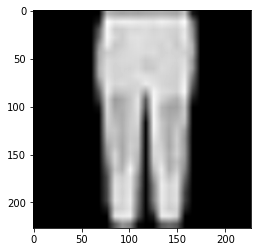

Real Label: Trouser
Predicted:  Trouser


In [ ]:
#데이터 이미지 및 lable 확인
vaild_features, vaild_labels = next(iter(validation_loader))
print(f"Feature batch shape: {vaild_features.size()}")
print(f"Labels batch shape: {vaild_labels.size()}")
img = vaild_features[0].squeeze()
label = class_names[vaild_labels[0]]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Real Label: {label}")
va_img = vaild_features.to(device)
outputs = model(va_img)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', class_names[predicted[0]])

In [ ]:
print(predicted)
print(predicted[0])

tensor([8, 7, 1, 4, 4, 2, 1, 8, 5, 8, 2, 6, 2, 3, 1, 8, 6, 9, 5, 3, 6, 9, 6, 3,
        3, 1, 6, 9, 1, 7, 4, 5, 4, 7, 5, 6, 3, 2, 6, 7, 2, 9, 6, 6, 2, 5, 2, 1,
        4, 4, 5, 7, 4, 8, 1, 1, 0, 2, 4, 7, 0, 4, 7, 0, 1, 8, 0, 8, 3, 2, 3, 8,
        9, 6, 6, 2, 5, 6, 1, 9, 3, 3, 0, 9, 0, 4, 0, 1, 6, 5, 0, 0, 1, 0, 8, 1,
        8, 1, 6, 2, 8, 9, 4, 8, 9, 5, 3, 9, 0, 3, 5, 8, 4, 7, 5, 5, 5, 6, 5, 2,
        0, 7, 8, 5, 8, 0, 0, 8], device='cuda:0')
tensor(8, device='cuda:0')
